In [1]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('./Joules_of_Siam_Data - FT_electricity_cost.csv')
df.drop(['Year','Average'],axis=1,inplace=True)
df.shape

(31, 12)

In [3]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
1,1.39,-15.32,-11.60,-11.6,-15.9,-37.29,-4.80,58.96,59.0,52.04,...,0.00,56.32,50.71,42.40,18.28,18.10,7.50,6.91,8.39,0.00
2,1.39,-15.32,-11.60,-11.6,-15.9,-37.29,-4.80,58.96,59.0,52.04,...,24.44,56.32,50.71,42.40,18.28,18.10,7.50,6.91,8.39,0.00
3,1.39,-15.32,-11.60,-11.6,-15.9,-37.29,-4.80,58.96,59.0,52.04,...,24.44,56.32,50.71,42.40,26.73,18.10,14.85,3.56,8.39,0.00
4,1.39,-15.32,-11.60,-11.6,-15.9,-37.29,-4.80,58.96,59.0,52.04,...,24.44,61.52,32.61,50.45,26.73,22.87,14.85,0.36,5.32,0.00
5,24.77,-15.32,-11.60,-11.6,-15.9,-24.77,-33.29,49.61,69.0,46.92,...,24.44,61.52,32.61,50.45,26.73,22.87,14.85,9.53,5.32,0.00
6,24.77,-15.32,-11.60,-11.6,-15.9,-24.77,-33.29,49.61,69.0,46.92,...,27.13,61.52,32.61,50.45,26.73,22.50,17.35,2.80,5.32,0.00
7,24.77,-15.32,-11.60,-11.6,-15.9,-24.77,-33.29,49.61,69.0,46.92,...,27.13,61.52,32.61,50.45,26.73,25.82,24.70,2.80,3.24,0.00
8,24.77,-15.32,-11.60,-11.6,-15.9,-24.77,-33.29,49.61,69.0,46.92,...,27.13,64.52,37.92,55.77,26.73,25.82,19.95,-0.53,-1.86,0.00
9,93.43,-15.32,-12.43,-11.6,-15.9,-15.90,-33.29,46.38,69.0,54.00,...,27.13,64.52,37.92,55.77,26.73,25.82,23.82,7.50,-1.86,6.17
10,93.43,-15.32,-12.43,-11.6,-15.9,-15.90,-33.29,46.38,69.0,54.00,...,22.77,0.00,37.92,55.77,26.73,20.42,18.10,7.50,-1.86,6.17


In [4]:
df = df.stack().reset_index()
df.columns

Index(['level_0', 'level_1', 0], dtype='object')

In [5]:
df.drop(['level_0'],axis=1,inplace=True)
df.rename(columns = {'level_1':'Date',0:'FT'}, inplace=True)

In [6]:
df.head()

,Date,FT
0,1,1.39
1,2,1.39
2,3,1.39
3,4,1.39
4,5,24.77


In [7]:
df.Date = [i for i in range(1,df.shape[0]+1)]

In [8]:
def convert(i):
    year = 1992 + int(i)//12
    i = i%12
    return f'{year}-{i}'

In [9]:
df.Date = df.Date.apply(convert)

In [10]:
df.Date

0       1992-1
1       1992-2
2       1992-3
3       1992-4
4       1992-5
        ...   
367     2022-8
368     2022-9
369    2022-10
370    2022-11
371     2023-0
Name: Date, Length: 372, dtype: object

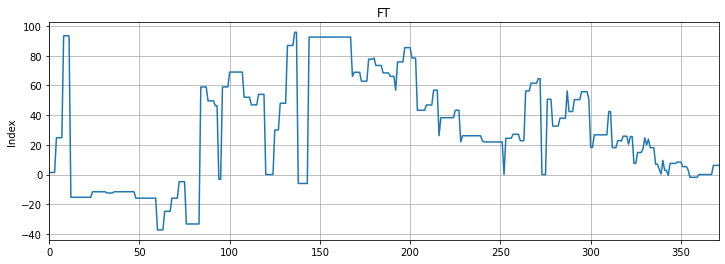

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.title('FT')
plt.ylabel('Index')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['FT'])
plt.show()

In [12]:
y = df['FT'].values.astype(float)

test_size = 12
window_size = 12

train_set = y[:-test_size]
test_set  = y[-test_size:]

print(f'Train: {len(train_set)}')
print(f'Test:  {len(test_set)}')

Train: 360
Test:  12


In [13]:
scaler = MinMaxScaler(feature_range=(-1, 1))

train_norm = scaler.fit_transform(train_set.reshape(-1, 1))

print(f'First item, original: {train_set[0]}')
print(f'First item, scaled: {train_norm[0]}')

First item, original: 1.39
First item, scaled: [-0.41878287]


In [14]:
train_norm = torch.FloatTensor(train_norm).view(-1)

def input_data(seq,ws):
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [15]:
train_data = input_data(train_norm,window_size)

print(f'Train_data: {len(train_data)}')

Train_data: 348


In [16]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=64,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]
    
torch.manual_seed(101)
model = LSTMnetwork()
model

LSTMnetwork(
  (lstm): LSTM(1, 64)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)

In [17]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [18]:
epochs = 50

for i in range(epochs):
    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        # apply the model
        y_pred = model(seq)

        # update parameters
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # OPTIONAL print statement
    print(f'{i+1} of {epochs} epochs completed')

1 of 50 epochs completed
2 of 50 epochs completed
3 of 50 epochs completed
4 of 50 epochs completed
5 of 50 epochs completed
6 of 50 epochs completed
7 of 50 epochs completed
8 of 50 epochs completed
9 of 50 epochs completed
10 of 50 epochs completed
11 of 50 epochs completed
12 of 50 epochs completed
13 of 50 epochs completed
14 of 50 epochs completed
15 of 50 epochs completed
16 of 50 epochs completed
17 of 50 epochs completed
18 of 50 epochs completed
19 of 50 epochs completed
20 of 50 epochs completed
21 of 50 epochs completed
22 of 50 epochs completed
23 of 50 epochs completed
24 of 50 epochs completed
25 of 50 epochs completed
26 of 50 epochs completed
27 of 50 epochs completed
28 of 50 epochs completed
29 of 50 epochs completed
30 of 50 epochs completed
31 of 50 epochs completed
32 of 50 epochs completed
33 of 50 epochs completed
34 of 50 epochs completed
35 of 50 epochs completed
36 of 50 epochs completed
37 of 50 epochs completed
38 of 50 epochs completed
39 of 50 epochs compl

In [19]:
future = 30
preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())
        
# preds[window_size:]

In [20]:
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
# true_predictions

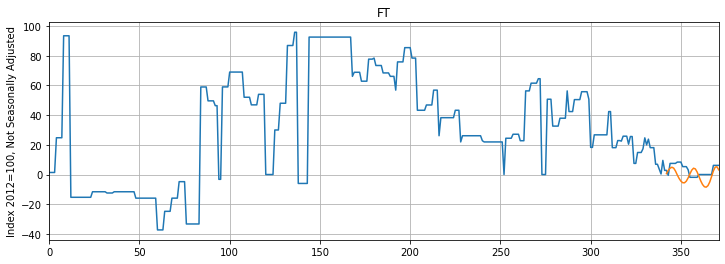

In [21]:
x = np.arange(342,372)

plt.figure(figsize=(12,4))
plt.title('FT')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['FT'])
plt.plot(x,true_predictions)
plt.show()

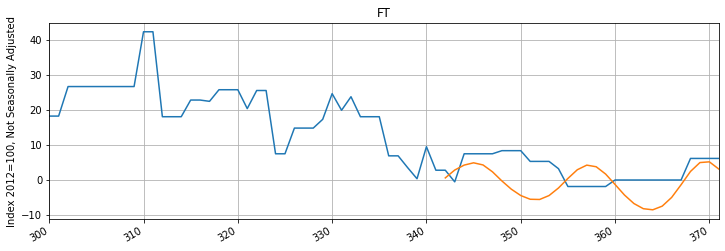

In [22]:
fig = plt.figure(figsize=(12,4))
plt.title('FT')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['FT'][300:])
plt.plot(x,true_predictions)
plt.show()